In [85]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import dataset as dataset
import datapreparation as datp
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import copy
import importlib
import GRU as gru

In [103]:
#reload imports
importlib.reload(datp)
importlib.reload(gru)
neuraldir = os.path.abspath(os.path.join(os.curdir, os.pardir))
data = dataset.pianoroll_dataset_batch(neuraldir+'\\datasets\\training\\voicesonly\\piano_roll_fs_1')
print(torch.cuda.is_available())

True


In [87]:
## Initialize Generalist
## Generalist(input_size, hidden_size, num_tags)
model_generalist = gru.Generalist(128, 256, int(data.num_tags()))
model_generalist.optimizer = torch.optim.Adam(model_generalist.parameters(), lr=5e-04)
model_generalist.loss_log = []

In [ ]:
## Train the generalist
num_epochs = 2000
## Returns state for transferred training
state = gru.train_sequence(model_generalist, num_epochs, data, model_generalist.optimizer, model_generalist.loss_log)

In [13]:
## Save the Generalist state
dir_path = os.path.dirname(os.path.realpath(gru.__file__))
torch.save(state, dir_path+'\\Chorals2.pt')

## Current best state 1000 epochs, 256 hidden_size.

In [5]:
## Print Generalist state
print('Total number of epochs run: ', len(model_generalist.loss_log))
print('Epoch number of lowest loss: ', model_generalist.loss_log.index(min(model_generalist.loss_log)))
print('Loss for best epoch', min(model_generalist.loss_log))

Total number of epochs run:  2000
Epoch number of lowest loss:  1378
Loss for best epoch 109.67068357020617


In [88]:
## Load saved weights into Generalist model
# OLD BACKUP: NOT CHORALS
#model_generalist.optimizer = gru.load(model_generalist, filename='Generalist.pt')

# CHORALS
model_generalist, model_generalist.optimizer = gru.load(model_generalist, filename='Chorals.pt')



CUDA


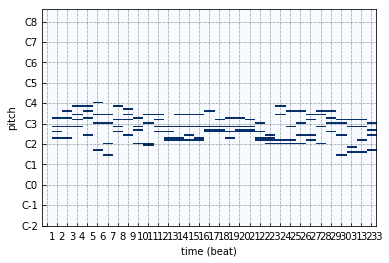

In [105]:
## Generate Generalist music
embed, matrix, song_raw = gru.gen_music_seconds_smooth(model_generalist, data[45][0] ,composer=0,fs=1,gen_seconds=32,init_seconds=5, device='cpu')
embed



#matrix *= 100
#datp.piano_roll_to_mid_file(matrix,"output.mid",1,74) # 16 Organ

In [69]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
song_round = numpy.round(song_raw, decimals=1)

print(song_round)



[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0

# Export pianoroll as CSV

In [12]:
import numpy
roll = matrix.astype(int)
numpy.savetxt("test.csv", roll, fmt='%i', delimiter=",")

# Convert csv to midi

In [25]:
roll *= 100
datp.piano_roll_to_mid_file(roll,"test2.mid",1,1)

'C:\\DeepLearning\\Master\\neuralnet\\helpers\\test2.mid'

In [18]:

#data2 = dataset.pianoroll_dataset_batch("C:\DeepLearning\Master\\IP\\fourpart\\output")
data2 = dataset.pianoroll_dataset_batch("C:\DeepLearning\Master\\neural-composer-assignement\datasets\\training\\voicesonly")
print(data2[0][0].shape[2])

datp.visualize_piano_roll(data2.data[0],fs=1)
play, matrix = datp.embed_play_v1(data2.data[0],fs=1)
play

#matrix *= 100
#datp.piano_roll_to_mid_file(matrix,"output.mid",1,74) # 16 Organ

IndexError: list index out of range

In [14]:
for i in range(1, 9):
    data2 = dataset.pianoroll_dataset_batch("C:\DeepLearning\Master\\IP\\fourpart\\output")
    print(data2[i][0].shape[2])
    play, matrix = datp.embed_play_v1(data2.data[i],fs=1)
    
    
    matrix *= 100
    datp.piano_roll_to_mid_file(matrix,"test"+str(i)+".mid",1,74)

128
128
128
128
128
128
128
128
